In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
#Inspiration:
#How has the length of songs changed throughout the years?
#How has explicitness in songs evolved in time?
#Evolution of music duration, loudness & tempo over the decades (reddit sample)


In [3]:
path = '/home/carlos/Dokument/data/tracks_features.csv'

In [4]:
df = pd.read_csv(path)
df.head(20)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.026100,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.012900,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.023400,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.163000,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.001620,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
5,2LXPNLSMAauNJfnC58lSqY,Born of a Broken Man,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],6,1,False,0.298,...,0.0727,0.053800,0.001520,0.2010,0.194,148.282,280960,4.0,1999,1999-11-02
6,3moeHk8eIajvUEzVocXukf,Born As Ghosts,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],7,1,False,0.417,...,0.1750,0.000427,0.000134,0.1070,0.483,90.395,202040,4.0,1999,1999-11-02
7,4llunZfVXv3NvUzXVB3VVL,Maria,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],8,1,False,0.277,...,0.0883,0.006940,0.000054,0.1880,0.618,172.848,228093,4.0,1999,1999-11-02
8,21Mq0NzFoVRvOmLTOnJjng,Voice of the Voiceless,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],9,1,False,0.441,...,0.0440,0.019500,0.006840,0.1500,0.418,83.371,151573,4.0,1999,1999-11-02
9,6s2FgJbnnMwFTpWJZzvb6z,New Millennium Homes,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],10,1,False,0.448,...,0.0676,0.003060,0.000000,0.0987,0.761,92.777,224933,4.0,1999,1999-11-02


In [5]:
#I will use the year and release date (possibly) as index so I will need to transform them to Datetime type.

In [6]:
#Converting ms to minutes. Adding a column that is the result of multiplying the existing ms info times 0.000016667

df['minutes'] = round((df['duration_ms'] * 0.000016667), 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [8]:
#There are 10 values in year = 0. We need to drop them in order to do a proper plot.
df = df[df['year'] != 0]

In [9]:
#I want to use the year column as index for some graphs so I will change the current int64 to dateindex format,
#eventually.

In [10]:
#I want to know how the length of songs has changed through the years. 
#I will focus the information on year, length (in minuntes) and possible id.

In [11]:
len_song = df[['year','minutes','id']]
df_len = pd.DataFrame(len_song)

In [12]:
df_len = df_len.set_index('year')

In [13]:
df_len = df_len.sort_index()

In [14]:
df_len.drop('id', axis = 1, inplace = True)

In [15]:
df_len.head()

,minutes
year,
1900,7.23
1900,11.21
1900,9.45
1900,8.87
1900,4.06


In [16]:
length = df_len.groupby('year')['minutes'].agg(['min', 'median', 'max'])

<AxesSubplot: xlabel='year'>

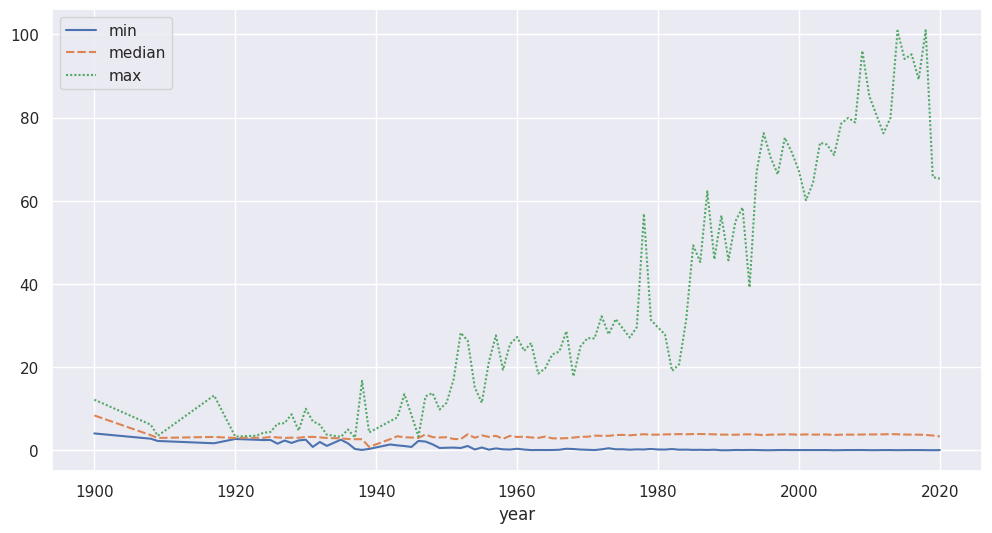

In [17]:
sns.set(rc={"figure.figsize":(12, 6)}) #width=12, height=6
sns.lineplot(data = length)

In [18]:
#Let's do a bit of cleaning and look only to data from 1915 onwards and that are at least 1 min in length
df_len = df_len[df_len['minutes'] > 1]

In [19]:
df_len = df_len.loc[1915::]

In [20]:
df_len.describe()

,minutes
count,1.173977e+06
mean,4.236396e+00
std,2.678862e+00
min,1.010000e+00
25%,2.980000e+00
50%,3.780000e+00
75%,4.800000e+00
max,1.010200e+02


Text(0.5, 1.0, 'Average length of songs released between 1915-2020')

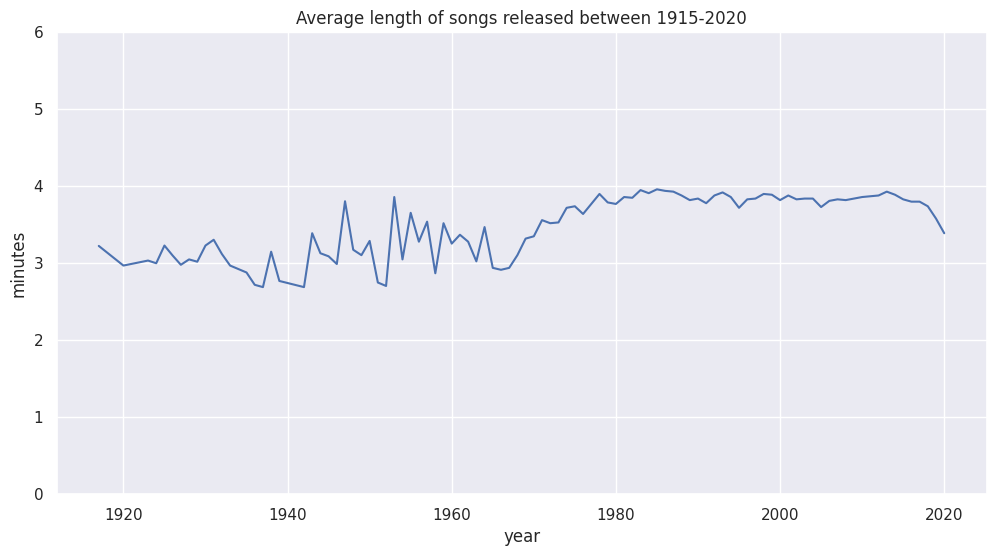

In [21]:
length_new = df_len.groupby('year')['minutes'].median()
sns.lineplot(data = length_new)
plt.ylim(0, 6)
plt.title('Average length of songs released between 1915-2020')

What is the loudest song from the dataset? 

In [58]:
df[['name', 'album', 'artists','loudness','year']].sort_values(by='loudness', ascending = False).head()

,name,album,artists,loudness,year
1018788,Bucket,Dash,['Sissy Spacek'],7.234,2010
1018799,Mondo Employee,Dash,['Sissy Spacek'],7.115,2010
1018801,Norge Est,Dash,['Sissy Spacek'],6.980,2010
1018792,Devil May Care,Dash,['Sissy Spacek'],6.863,2010
1018787,(The) Repulse,Dash,['Sissy Spacek'],6.798,2010


No suprise here the top 50 is made up almost in its entirity by noise bands.
Link to Mondo Employee by Sissy Spacek : https://www.youtube.com/watch?v=RZ1XjDXjyU4

In [64]:
df_loud = df[['name', 'album', 'artists','loudness','year']]

In [66]:
loud = pd.DataFrame(df_loud)

In [68]:
loud.groupby('album')['loudness'].mean()

album
!                                                                         -5.600875
!Sock Ray Blue!                                                           -5.767462
" .. and the Flying Machine .. "                                         -11.449000
"!"                                                                       -7.950167
"25"                                                                     -21.881000
                                                                            ...    
모노드라마 Monodrama - SM STATION                                              -6.860500
빛과 소금                                                                    -12.851444
세가지 소원 Wish Tree - WINTER GARDEN                                          -4.350000
청춘시대 Age of Youth (Official Music from the Korean Tv Drama, Pop Album)   -11.230375
행복(Happiness)                                                             -3.099000
Name: loudness, Length: 106160, dtype: float64

What is the most danceable song from the list?

In [55]:
df[['name', 'album', 'artists','danceability','year']].sort_values(by='danceability', ascending = False).head()

,name,album,artists,danceability,year
456635,Unendlich,Versammlung 1,['Wolfgang Voigt'],1.000,2015
726027,Na-try Mo Na Ba Ako,Clean,['Andrew E.'],0.994,2007
1192428,Roll Like Dis / Cha-cha Slide Part 2,Mr. C Presents The Cha-cha Slide Greatest Hits,['Mr. C'],0.993,2009
765603,Techno Is Not Fault,Techno Is Not Fault,['Andrea HEinstein'],0.992,2018
726033,"Aussie, Aussie (O, Sige!)",Clean,['Andrew E.'],0.991,2007


Top position is debatable but many of the top 10 songs are quite danceable!
Link to Roll Like Dis / Cha-cha Slide Part 2 by Mr. C : https://www.youtube.com/watch?v=ace2zDmnb1I